# Sample Data Ingest

In [1]:
prototyping_datafolder=r"C:\Users\drago\Box\p_MIS-MISalign\data_AlignCV"

In [2]:
from os import listdir,path
import pandas as pd

In [3]:
data_set=dict()
for datafolder in listdir(prototyping_datafolder):
    for sample in listdir(path.join(prototyping_datafolder,datafolder)):
        entry=dict()
        entry["dataset"]=datafolder
        entry["path"]=path.join(prototyping_datafolder,datafolder,sample)
        data_set[sample]=entry
df=pd.DataFrame(data_set).T
df

,dataset,path
sample_hdf0.tif,data_hdf,C:\Users\drago\Box\p_MIS-MISalign\data_AlignCV...
sample_hdf1.tif,data_hdf,C:\Users\drago\Box\p_MIS-MISalign\data_AlignCV...
sample_hdf2.tif,data_hdf,C:\Users\drago\Box\p_MIS-MISalign\data_AlignCV...
sample_hdf3.tif,data_hdf,C:\Users\drago\Box\p_MIS-MISalign\data_AlignCV...
sample_hov0.tif,data_hov,C:\Users\drago\Box\p_MIS-MISalign\data_AlignCV...
sample_hov1.tif,data_hov,C:\Users\drago\Box\p_MIS-MISalign\data_AlignCV...
sample_hov2.tif,data_hov,C:\Users\drago\Box\p_MIS-MISalign\data_AlignCV...
sample_hov3.tif,data_hov,C:\Users\drago\Box\p_MIS-MISalign\data_AlignCV...
sample_ldf0.tif,data_ldf,C:\Users\drago\Box\p_MIS-MISalign\data_AlignCV...
sample_ldf1.tif,data_ldf,C:\Users\drago\Box\p_MIS-MISalign\data_AlignCV...


In [ ]:
print(df.iloc[0].path)
display(df[df.dataset=="data_nov"])

# Image opening

In [5]:
from PIL import Image as PILImage

In [6]:
PILImage.open(df.iloc[0].path).show()

# Package Setups

## OpenCV

In [7]:
# https://docs.opencv.org/4.x/d5/de5/tutorial_py_setup_in_windows.html
# https://pypi.org/project/opencv-python/#manual-builds
# %pip install opencv-python
import cv2 as cv

In [ ]:
# https://docs.opencv.org/4.x/d6/d00/tutorial_py_root.html
# https://docs.opencv.org/4.x/db/d27/tutorial_py_table_of_contents_feature2d.html

### SIFT

In [ ]:
# SIFT https://docs.opencv.org/4.x/da/df5/tutorial_py_sift_intro.html
import numpy as np
import cv2 as cv
 
img = cv.imread(df.iloc[0].path)
gray= cv.cvtColor(img,cv.COLOR_BGR2GRAY)
 
sift = cv.SIFT_create()
kp = sift.detect(gray,None)
 
# img=cv.drawKeypoints(gray,kp,img)
img=cv.drawKeypoints(gray,kp,img,flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
 
# cv.imshow('sift_keypoints',img)
PILImage.fromarray(img).show()
# display(PILImage.fromarray(img))

In [ ]:
kp,des = sift.compute(gray,kp)
display(des.shape)

### ORB

In [9]:
# https://docs.opencv.org/4.x/d1/d89/tutorial_py_orb.html
img = cv.imread(df.iloc[-2].path)
gray= cv.cvtColor(img,cv.COLOR_BGR2GRAY)

# Initiate ORB detector
orb = cv.ORB_create(nfeatures=500,edgeThreshold=5)
 
# find the keypoints with ORB
kp = orb.detect(gray,None)
 
# compute the descriptors with ORB
kp, des = orb.compute(gray, kp)
 
# draw only keypoints location,not size and orientation
# img2 = cv.drawKeypoints(gray, kp, None, color=(0,255,0), flags=0)
img2=cv.drawKeypoints(gray,kp,img,flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
PILImage.fromarray(img2).show()
# PILImage.fromarray(img2).save("241210_ORB_sem3_nf500_et5.png")

In [ ]:
display(des.shape)

### Matcher

In [ ]:
# https://docs.opencv.org/4.x/dc/dc3/tutorial_py_matcher.html

#### Brute-Force Matching w/ ORB

In [11]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
 
img1 = cv.imread(df.iloc[0].path,cv.IMREAD_GRAYSCALE)          # queryImage
img2 = cv.imread(df.iloc[1].path,cv.IMREAD_GRAYSCALE) # trainImage
 
# Initiate ORB detector
orb = cv.ORB_create()
 
# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

In [ ]:
# create BFMatcher object
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)
 
# Match descriptors.
matches = bf.match(des1,des2)
 
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)
 
# Draw first 10 matches.
img3 = cv.drawMatches(img1,kp1,img2,kp2,matches[:10],None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
 
plt.imshow(img3)
plt.show()

In [ ]:
kp2[matches[0].trainIdx].pt
kp1[matches[0].queryIdx].pt

In [ ]:
for i,match in enumerate(matches[:]):
    train_pt=kp2[match.trainIdx].pt
    query_pt=kp1[match.queryIdx].pt
    x_offset=train_pt[0]-query_pt[0]
    y_offset=train_pt[1]-query_pt[1]
    # print([x_offset],[y_offset])
    # plt.plot([0,x_offset],[0,y_offset],alpha=0.1)
    plt.plot([x_offset],[y_offset],"o",alpha=0.05,markersize=20)
    if i<50:
        plt.plot([0,x_offset],[0,y_offset],alpha=0.05)
plt.xlim([-1200,1200])
plt.ylim([-800,800])
plt.title("Matches Visualized - all matches dots - top 50 matches lines - 0.05 alpha")
plt.show()

## SimpleCV

In [ ]:
# Paused to focus on moving forward with OpenCV

## Scikit-Image

In [ ]:
# Paused to focus on moving forward with OpenCV

# Set Processing

In [ ]:
# set_df=df[df.dataset=="data_hdf"].copy() # 2x2 high distinct feature set
set_df=df[df.dataset=="data_sem"].copy() # 4x1 low overlap set
set_df

In [ ]:
orb_data=dict()
for name,sample in set_df.iterrows():
    # print(sample)
    img = cv.imread(sample.path, cv.IMREAD_GRAYSCALE)
    orb = cv.ORB_create(edgeThreshold=5)
    kp, des = orb.detectAndCompute(img,None)
    orb_data[name]={"img":img,"kp":kp,"des":des}
orb_df=pd.DataFrame(orb_data).T
orb_df

In [18]:
from itertools import combinations

In [ ]:
img_width=2560
img_height=1672
match_combs=combinations(set_df.index.to_list(),2)
# print(list(match_combs))
match_data=dict()
for m1,m2 in match_combs:
    print(m1,m2)
    bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)
    matches = bf.match(orb_df["des"][m1],orb_df["des"][m2])
    matches = sorted(matches, key = lambda x:x.distance)
    img3 = cv.drawMatches(orb_df["img"][m1],orb_df["kp"][m1],orb_df["img"][m2],orb_df["kp"][m2],matches[:10],None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    plt.imshow(img3)
    plt.savefig(f"241211_OCV_MOSet_{m1[7:11]}-{m2[10:11]}-matches.png",bbox_inches="tight",dpi=300)
    plt.show()
    for i,match in enumerate(matches[:]):
        train_pt=orb_df["kp"][m2][match.trainIdx].pt
        query_pt=orb_df["kp"][m1][match.queryIdx].pt
        x_offset=train_pt[0]-query_pt[0]
        y_offset=train_pt[1]-query_pt[1]
        plt.plot([x_offset],[y_offset],"o",alpha=0.05,markersize=20)
        if i<50:
            plt.plot([0,x_offset],[0,y_offset],alpha=0.05)
    plt.xlim([-img_width,img_width])
    plt.ylim([-img_height,img_height])
    plt.savefig(f"241211_OCV_MOSet_{m1[7:11]}-{m2[10:11]}-offsets.png",bbox_inches="tight")
    plt.show()

# Offset Determination

## Prototyping
- lro2-3 for clean-defined
- lro0-2 for fuzzy rotated
- lro1-2 for similar feature but no match
- hdf0-2 for corner barely match
- hdf0-1 for clean-defined
- hdf1-3 for clean-defined
- lov2-3 for fuzzy match
- lov1-2 for fuzzy match
- ldf0-3 for clean match w/ noise
- ldf2-3 for clean match w/ noise


In [ ]:
samples_short=["sem0","sem1","sem2","sem3","sem4","sem5"]#["lro0","lro1","lro2","lro3","hdf0","hdf1","hdf2","hdf3","lov1","lov2","lov3","ldf0","ldf2","ldf3"]
samples=pd.DataFrame([df[df.index.str.contains(x)].iloc[0] for x in samples_short])
samples

In [ ]:
orb_data=dict()
for name,sample in samples.iterrows():
    # print(sample)
    img = cv.imread(sample.path, cv.IMREAD_GRAYSCALE)
    orb = cv.ORB_create(nfeatures=500,edgeThreshold=5)
    kp, des = orb.detectAndCompute(img,None)
    orb_data[name]={"img":img,"kp":kp,"des":des}
orb_df=pd.DataFrame(orb_data).T
orb_df

In [24]:
from scipy import ndimage

In [ ]:
# match_combs=combinations(orb_df.index.to_list(),2)
# match_combs=(("lro2","lro3"),("lro0","lro2"),("lro1","lro2"),("hdf0","hdf2"),("hdf0","hdf1"),("hdf1","hdf3"),("lov2","lov3"),("lov1","lov2"),("ldf0","ldf3"),("ldf2","ldf3"))
# match_combs=(("sem0","sem1"),("sem2","sem3"),("sem3","sem4"),("sem4","sem5"),("sem3","sem5"))
match_combs=(("sem0","sem1"),("sem2","sem3"),("sem3","sem4"),("sem4","sem5"),("sem3","sem5"))
match_combs=[(df.index[df.index.str.contains(x[0])][0],df.index[df.index.str.contains(x[1])][0]) for x in match_combs]

match_combs

In [ ]:
img_width=2560
img_height=1672
for m1,m2 in match_combs:
    bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)
    matches = bf.match(orb_df["des"][m1],orb_df["des"][m2])
    matches = sorted(matches, key = lambda x:x.distance)
    print([m.distance for m in matches])
    offset_grid=np.zeros((2*img_width,2*img_height),dtype=float) # change this to match 2x image distance.(3200,2400)
    for i,match in enumerate(matches[:]):
        train_pt=orb_df["kp"][m2][match.trainIdx].pt
        query_pt=orb_df["kp"][m1][match.queryIdx].pt
        x_offset_adj=int(train_pt[0]-query_pt[0]+img_width) #1600/1200 centers in numpy array/image.
        y_offset_adj=int(train_pt[1]-query_pt[1]+img_height)
        offset_grid[x_offset_adj,y_offset_adj]+=1000/(match.distance**2)
    offset_grid=ndimage.gaussian_filter(offset_grid,10)
    print(m1,m2,"Offset:",np.array(np.unravel_index(np.argmax(offset_grid),offset_grid.shape))-np.array([img_width,img_height]))
    plt.title(" ".join([m1,m2,str(tuple(np.array(np.unravel_index(np.argmax(offset_grid),offset_grid.shape))-np.array([img_width,img_height]))),f"{offset_grid.max():.5f}"]))
    plt.imshow(offset_grid.T)
    plt.colorbar()
    plt.savefig(f"241210_OffsetMap_{m1[7:11]}-{m2[10:11]}-offmap-1000imds-g10_nf500_et5.png",bbox_inches="tight",dpi=300)
    plt.show()
    # img3 = cv.drawMatches(orb_df["img"][m1],orb_df["kp"][m1],orb_df["img"][m2],orb_df["kp"][m2],matches[:10],None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    # plt.imshow(img3)
    # plt.savefig(f"240815_OCV_MOSet_{m1[7:11]}-{m2[10:11]}-matches.png",bbox_inches="tight",dpi=300)
    # plt.show()
    # for i,match in enumerate(matches[:]):
    #     train_pt=orb_df["kp"][m2][match.trainIdx].pt
    #     query_pt=orb_df["kp"][m1][match.queryIdx].pt
    #     x_offset=train_pt[0]-query_pt[0]
    #     y_offset=train_pt[1]-query_pt[1]
    #     plt.plot([x_offset],[y_offset],"o",alpha=0.05,markersize=20)
    #     if i<50:
    #         plt.plot([0,x_offset],[0,y_offset],alpha=0.05)
    # plt.xlim([-1600,1600])
    # plt.ylim([-1200,1200])
    # plt.savefig(f"240815_OCV_MOSet_{m1[7:11]}-{m2[10:11]}-offsets.png",bbox_inches="tight")
    # plt.show()

In [ ]:
# testing way to get/compare local maxima. Code from `https://stackoverflow.com/questions/9111711/get-coordinates-of-local-maxima-in-2d-array-above-certain-value`
import numpy as np
import scipy.ndimage as ndimage
import matplotlib.pyplot as plt


neighborhood_size = 50
threshold = 0.0005

data = offset_grid.T

data_max = ndimage.maximum_filter(data, neighborhood_size)
maxima = (data == data_max)
data_min = ndimage.minimum_filter(data, neighborhood_size)
diff = ((data_max - data_min) > threshold)
maxima[diff == 0] = 0

labeled, num_objects = ndimage.label(maxima)
xy = np.array(ndimage.center_of_mass(data, labeled, range(1, num_objects+1)))

plt.imshow(data)

plt.autoscale(False)
plt.plot(xy[:, 1], xy[:, 0], 'rx')


# Non-array/blended match>offset

In [ ]:
len(matches)

In [119]:
# image_from="sample_sem0.tif"
# image_to="sample_sem1.tif"
# sem 0 to sem 1: [48 1101] from offset map
# image_from="sample_sem3.tif"
# image_to="sample_sem5.tif"
# sem 3 to sem 5: No real relation
image_from="sample_sem3.tif"
image_to="sample_sem4.tif"
# 3>4 has distinct relation in offset map

matches = bf.match(orb_df["des"][image_from],orb_df["des"][image_to])
matches = sorted(matches, key = lambda x:x.distance)

pts_from=np.array([orb_df["kp"][image_from][match.queryIdx].pt for match in matches])
pts_to=np.array([orb_df["kp"][image_to][match.trainIdx].pt for match in matches])

In [120]:
eAP2D=cv.estimateAffinePartial2D(pts_from,pts_to)


In [ ]:
print("X,Y:",eAP2D[0][:,2])
#cos^2 + sin^2 = 1 >> rotation/scale component of matrix =s^2
print("Rotation & Scale Matrix:",eAP2D[0][:,:2])
eAP2D_scalex=(eAP2D[0][0,0]**2+eAP2D[0][0,1]**2)**0.5
eAP2D_scaley=(eAP2D[0][1,1]**2+eAP2D[0][1,0]**2)**0.5
print("Scale X,Y:",[eAP2D_scalex,eAP2D_scaley])
eAP2D_rotation=np.arctan(eAP2D[0][0,1]/eAP2D[0][1,1])
print("Rotation(Rad/Deg):",eAP2D_rotation,"/",eAP2D_rotation*180/np.pi)


In [ ]:
print("Inliers:",np.sum(eAP2D[1]))
for pt_from,pt_to,in_out in zip(pts_from,pts_to,eAP2D[1]):
    if in_out:
        print("X,Y:",pt_to[0]-pt_from[0],pt_to[1]-pt_from[1])

# Set implementation
Also grabbing all need coded/imports/etc.

In [4]:
import pandas as pd
import cv2 as cv
from math import dist
import numpy as np
from matplotlib import pyplot as plt

Run data import from first section to setup `df`

In [32]:
samples_short=["sem0","sem1","sem2","sem3","sem4","sem5"]#
# samples_short=["lro0","lro1","lro2","lro3","hdf0","hdf1","hdf2","hdf3","lov1","lov2","lov3","ldf0","ldf2","ldf3"]
samples=pd.DataFrame([df[df.index.str.contains(x)].iloc[0] for x in samples_short])
samples

,dataset,path
sample_sem0.tif,data_sem,C:\Users\drago\Box\p_MIS-MISalign\data_AlignCV...
sample_sem1.tif,data_sem,C:\Users\drago\Box\p_MIS-MISalign\data_AlignCV...
sample_sem2.tif,data_sem,C:\Users\drago\Box\p_MIS-MISalign\data_AlignCV...
sample_sem3.tif,data_sem,C:\Users\drago\Box\p_MIS-MISalign\data_AlignCV...
sample_sem4.tif,data_sem,C:\Users\drago\Box\p_MIS-MISalign\data_AlignCV...
sample_sem5.tif,data_sem,C:\Users\drago\Box\p_MIS-MISalign\data_AlignCV...


In [31]:
# match_combs=combinations(orb_df.index.to_list(),2)
match_combs=(("sem0","sem1"),("sem2","sem3"),("sem3","sem4"),("sem4","sem5"),("sem3","sem5"))
# match_combs=(("lro2","lro3"),("lro0","lro2"),("lro1","lro2"),("hdf0","hdf2"),("hdf0","hdf1"),("hdf1","hdf3"),("lov2","lov3"),("lov1","lov2"),("ldf0","ldf3"),("ldf2","ldf3"))
# match_combs=(("lov2","lov3"),("lov1","lov2"),("ldf0","ldf3"))
match_combs=[(df.index[df.index.str.contains(x[0])][0],df.index[df.index.str.contains(x[1])][0]) for x in match_combs]


In [33]:
orb_data=dict()
for name,sample in samples.iterrows():
    # print(sample)
    img = cv.imread(sample.path, cv.IMREAD_GRAYSCALE)
    orb = cv.ORB_create(nfeatures=4000,edgeThreshold=5)
    kp, des = orb.detectAndCompute(img,None)
    orb_data[name]={"img":img,"kp":kp,"des":des}
orb_df=pd.DataFrame(orb_data).T
orb_df

,img,kp,des
sample_sem0.tif,"[[192, 189, 157, 230, 230, 242, 233, 242, 248,...","(< cv2.KeyPoint 000001A84036F840>, < cv2.KeyPo...","[[3, 207, 106, 143, 246, 147, 238, 239, 20, 5,..."
sample_sem1.tif,"[[150, 158, 123, 82, 110, 130, 115, 138, 238, ...","(< cv2.KeyPoint 000001A840462550>, < cv2.KeyPo...","[[191, 159, 230, 223, 255, 51, 254, 248, 95, 2..."
sample_sem2.tif,"[[180, 215, 226, 129, 136, 181, 180, 189, 186,...","(< cv2.KeyPoint 000001A840ACD920>, < cv2.KeyPo...","[[244, 10, 130, 190, 29, 129, 66, 64, 214, 5, ..."
sample_sem3.tif,"[[233, 247, 244, 229, 242, 176, 224, 221, 184,...","(< cv2.KeyPoint 000001A85260AF70>, < cv2.KeyPo...","[[17, 65, 6, 172, 30, 2, 234, 104, 196, 0, 203..."
sample_sem4.tif,"[[69, 83, 113, 148, 138, 109, 51, 102, 143, 14...","(< cv2.KeyPoint 000001A8525E1AD0>, < cv2.KeyPo...","[[49, 23, 2, 238, 53, 182, 66, 119, 29, 8, 251..."
sample_sem5.tif,"[[153, 205, 140, 174, 189, 124, 154, 144, 163,...","(< cv2.KeyPoint 000001A840A8B630>, < cv2.KeyPo...","[[35, 89, 248, 206, 252, 157, 214, 198, 79, 72..."


In [34]:
match_refs={#values for offset from offsetmap
    ("sem0","sem1"):[48, 1101],
    ("sem2","sem3"):[84, 1192],
    ("sem3","sem4"):[14, 682],
    ("sem4","sem5"):[1,1558],
    ("sem3","sem5"):[673,-538]
}

In [19]:
from scipy import ndimage

sample_sem0.tif sample_sem1.tif
X,Y:45.5, 1101.2
Rotation & Scale Matrix: 
 [[ 1.00126018e+00 -1.53685658e-04]
 [ 1.53685658e-04  1.00126018e+00]]
Scale X,Y: 1.001, 1.001
Rotation(Rad/Deg): -0.000 /-0.0
Inliers: 96
X,Y:-47.8, -1101.8
X,Y:-48.4, -1102.5
X,Y:-48.4, -1102.5
X,Y:-47.8, -1101.8
X,Y:-48.4, -1102.5
X,Y:-47.7, -1101.1
X,Y:-47.3, -1102.3
X,Y:-47.5, -1101.6
X,Y:-47.5, -1101.6
X,Y:-47.3, -1102.3
X,Y:-49.0, -1101.6
X,Y:-47.7, -1101.1
X,Y:-49.8, -1102.3
X,Y:-47.8, -1101.8
X,Y:-48.0, -1101.6
X,Y:-47.5, -1101.6
X,Y:-47.7, -1101.1
X,Y:-47.7, -1101.1
X,Y:-47.8, -1101.8
X,Y:-50.2, -1103.6
X,Y:-47.5, -1101.6
X,Y:-48.4, -1102.5
X,Y:-47.7, -1101.1
X,Y:-47.3, -1102.3
X,Y:-47.8, -1101.8
X,Y:-47.8, -1101.8
X,Y:-47.8, -1098.8
X,Y:-47.7, -1101.1
X,Y:-47.7, -1101.1
X,Y:-48.0, -1101.6
X,Y:-49.0, -1101.6
X,Y:-47.3, -1102.3
X,Y:-47.8, -1101.8
X,Y:-46.7, -1102.5
X,Y:-46.7, -1102.5
X,Y:-47.8, -1101.8
X,Y:-48.4, -1102.5
X,Y:-47.3, -1102.3
X,Y:-49.8, -1102.3
X,Y:-50.2, -1100.0
X,Y:-48.4, -1102.5
X,Y:-4

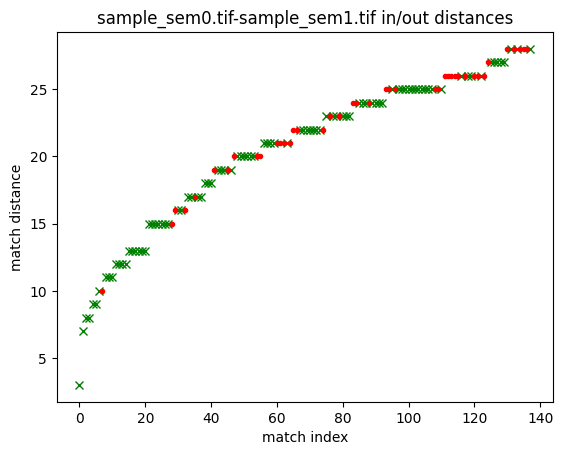

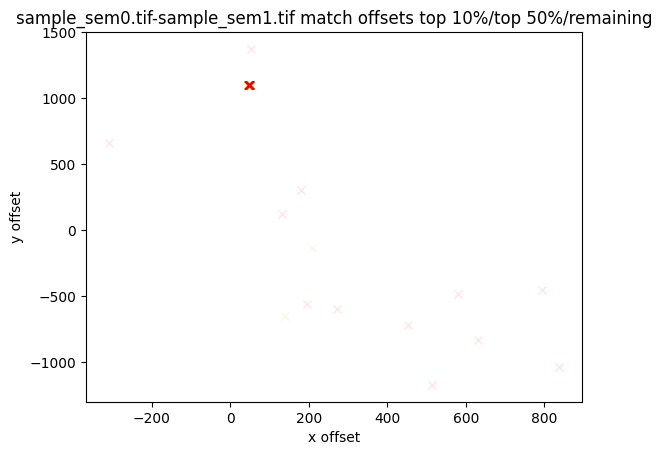

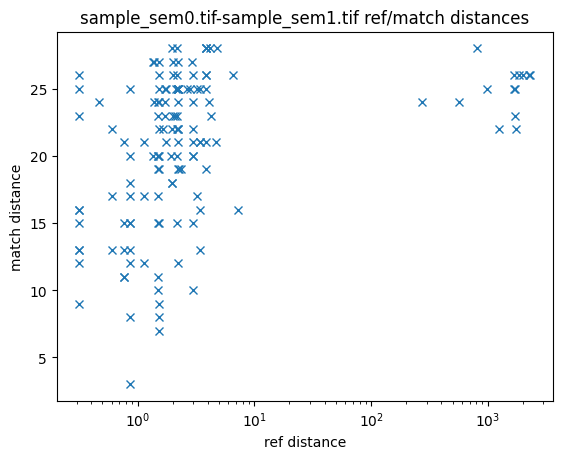

sample_sem2.tif sample_sem3.tif
X,Y:84.9, 1191.8
Rotation & Scale Matrix: 
 [[ 1.00149710e+00  2.70887795e-04]
 [-2.70887795e-04  1.00149710e+00]]
Scale X,Y: 1.001, 1.001
Rotation(Rad/Deg): 0.000 /0.0
Inliers: 10
X,Y:-86.6, -1191.4
X,Y:-86.0, -1193.2
X,Y:-85.0, -1192.3
X,Y:-85.2, -1191.6
X,Y:-84.7, -1192.3
X,Y:-88.5, -1192.0
X,Y:-87.6, -1191.6
X,Y:-84.6, -1191.9
X,Y:-89.2, -1192.3
X,Y:-87.8, -1190.6


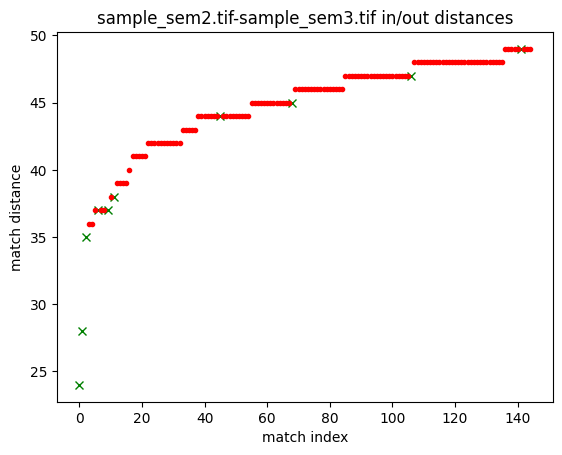

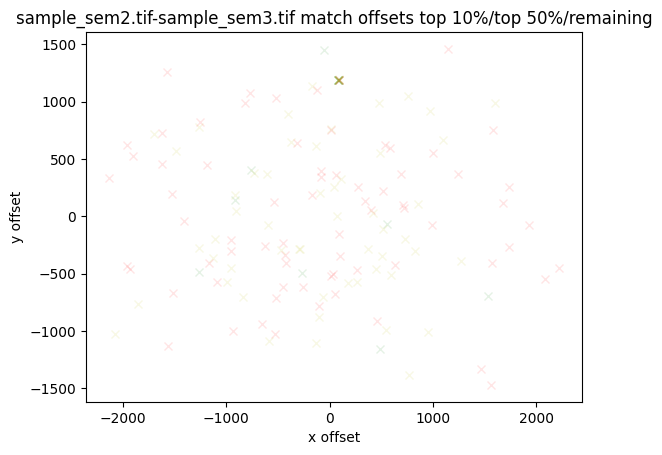

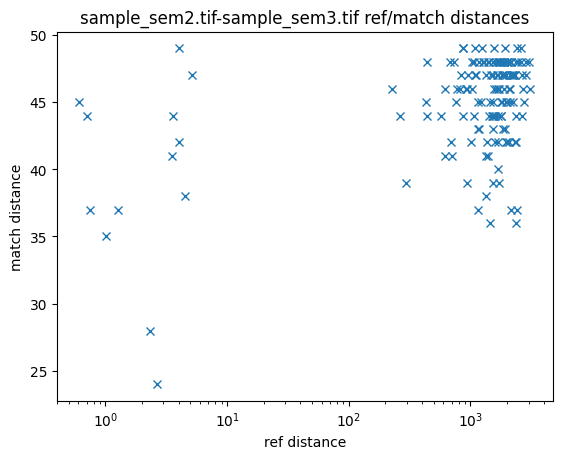

sample_sem3.tif sample_sem4.tif
X,Y:15.3, 683.2
Rotation & Scale Matrix: 
 [[ 9.99808757e-01  1.55392936e-04]
 [-1.55392936e-04  9.99808757e-01]]
Scale X,Y: 1.000, 1.000
Rotation(Rad/Deg): 0.000 /0.0
Inliers: 38
X,Y:-14.9, -683.8
X,Y:-14.9, -680.8
X,Y:-14.9, -681.8
X,Y:-14.3, -684.4
X,Y:-17.4, -681.8
X,Y:-14.9, -683.8
X,Y:-14.3, -684.4
X,Y:-14.3, -680.8
X,Y:-14.5, -682.2
X,Y:-14.5, -682.2
X,Y:-15.8, -682.6
X,Y:-14.9, -683.8
X,Y:-15.8, -682.6
X,Y:-14.9, -684.3
X,Y:-14.3, -684.4
X,Y:-15.8, -682.6
X,Y:-15.6, -682.6
X,Y:-14.9, -683.8
X,Y:-14.3, -684.4
X,Y:-15.9, -680.8
X,Y:-16.6, -682.2
X,Y:-13.8, -684.3
X,Y:-14.5, -682.2
X,Y:-14.9, -683.8
X,Y:-14.3, -680.8
X,Y:-14.9, -681.8
X,Y:-13.8, -684.3
X,Y:-16.6, -684.3
X,Y:-17.9, -683.8
X,Y:-16.6, -682.2
X,Y:-14.9, -683.8
X,Y:-17.9, -684.4
X,Y:-14.5, -682.2
X,Y:-15.8, -682.6
X,Y:-13.8, -680.8
X,Y:-14.5, -684.3
X,Y:-14.9, -681.8
X,Y:-14.9, -683.8


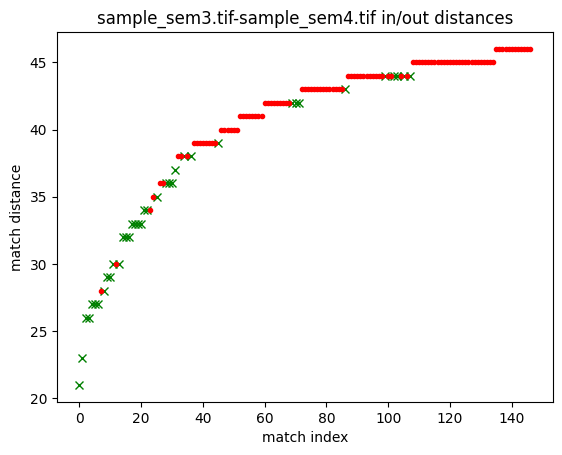

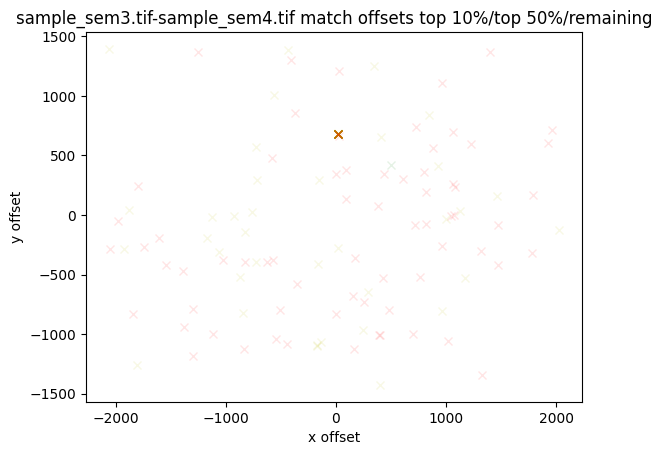

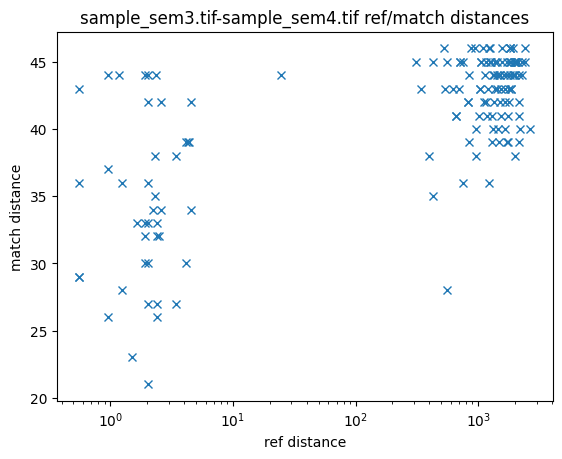

sample_sem4.tif sample_sem5.tif
X,Y:-34.2, 1573.4
Rotation & Scale Matrix: 
 [[ 1.0215557   0.01069556]
 [-0.01069556  1.0215557 ]]
Scale X,Y: 1.022, 1.022
Rotation(Rad/Deg): 0.010 /0.6
Inliers: 11
X,Y:-2.1, -1557.3
X,Y:-2.1, -1557.3
X,Y:-1.7, -1558.7
X,Y:-1.7, -1558.7
X,Y:0.0, -1558.7
X,Y:-0.0, -1557.8
X,Y:0.0, -1556.9
X,Y:0.0, -1557.3
X,Y:-2.1, -1557.3
X,Y:-1.7, -1558.0
X,Y:0.4, -1558.1


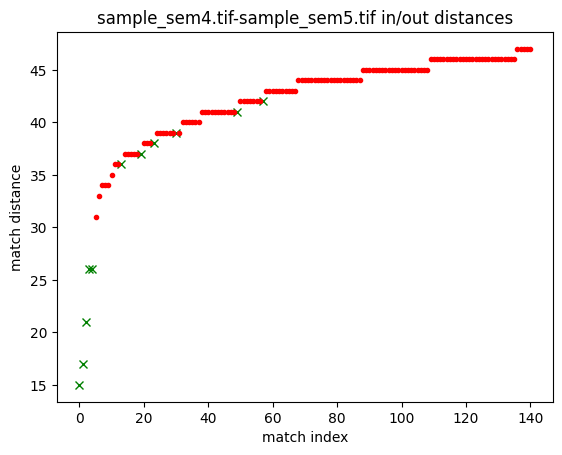

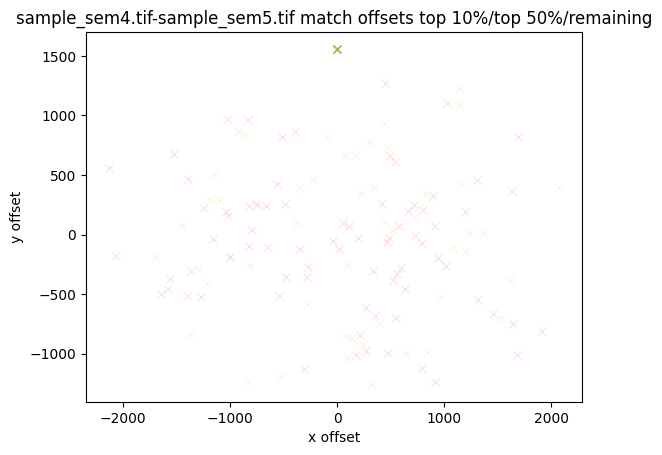

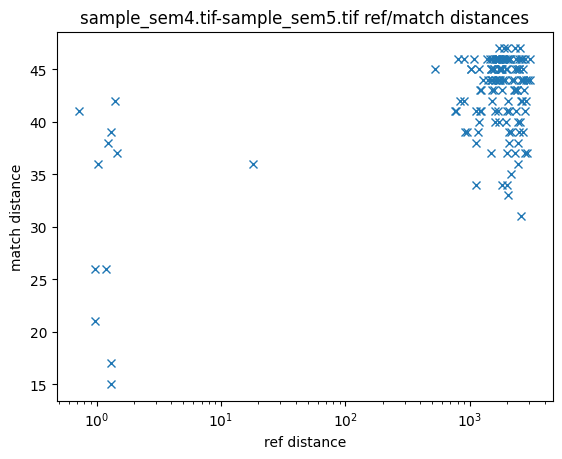

sample_sem3.tif sample_sem5.tif
X,Y:895.6, 820.6
Rotation & Scale Matrix: 
 [[-0.3046592   0.21790367]
 [-0.21790367 -0.3046592 ]]
Scale X,Y: 0.375, 0.375
Rotation(Rad/Deg): -0.621 /-35.6
Inliers: 3
X,Y:777.8, 564.4
X,Y:714.2, 89.3
X,Y:-1031.8, 613.2


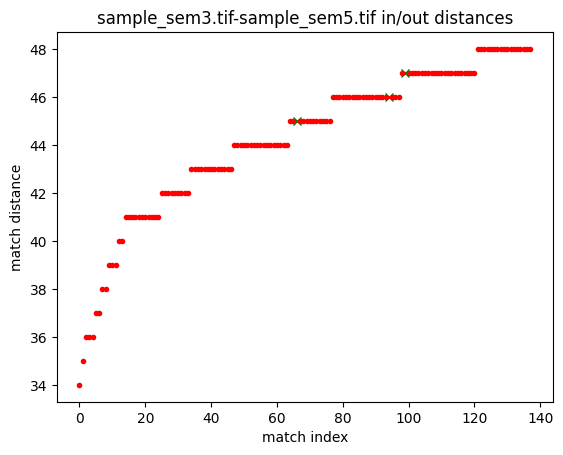

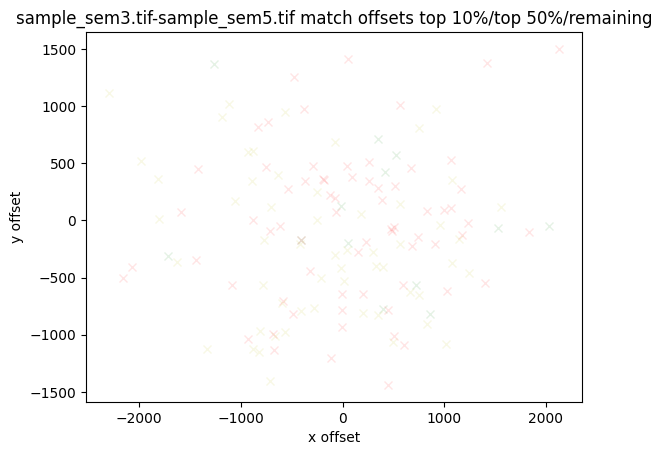

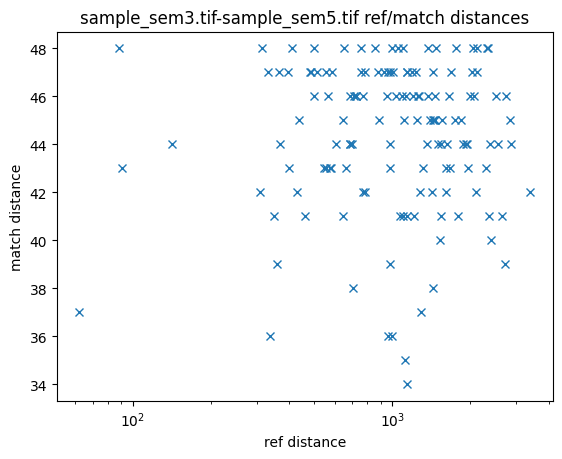

In [37]:
for m1,m2 in match_combs:
    print(m1,m2)
    bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)
    
    matches = bf.match(orb_df["des"][m1],orb_df["des"][m2])
    matches = sorted(matches, key = lambda x:x.distance)
    matches = matches[:int(len(matches)*(1/8))]
    # matches = matches[:10]

    pts_from=np.array([orb_df["kp"][m1][match.queryIdx].pt for match in matches])
    pts_to=np.array([orb_df["kp"][m2][match.trainIdx].pt for match in matches])

    eAP2D=cv.estimateAffinePartial2D(pts_from,pts_to)

    eAP2D_translationx=eAP2D[0][0,2]
    eAP2D_translationy=eAP2D[0][1,2]
    print(f"X,Y:{eAP2D_translationx:0.1f}, {eAP2D_translationy:0.1f}")
    print("Rotation & Scale Matrix: \n",eAP2D[0][:,:2])
    eAP2D_scalex=(eAP2D[0][0,0]**2+eAP2D[0][0,1]**2)**0.5
    eAP2D_scaley=(eAP2D[0][1,1]**2+eAP2D[0][1,0]**2)**0.5
    print(f"Scale X,Y: {eAP2D_scalex:0.3f}, {eAP2D_scaley:0.3f}")
    eAP2D_rotation=np.arctan(eAP2D[0][0,1]/eAP2D[0][1,1])
    print(f"Rotation(Rad/Deg): {eAP2D_rotation:0.3f} /{eAP2D_rotation*180/np.pi:0.1f}")
    print("Inliers:",np.sum(eAP2D[1]))
    for pt_from,pt_to,in_out in zip(pts_from,pts_to,eAP2D[1]):
        if in_out:
            print(f"X,Y:{pt_from[0]-pt_to[0]:0.1f}, {pt_from[1]-pt_to[1]:0.1f}")
    
    distances_inlier=np.array([(i,match.distance) for i,(match,in_out) in enumerate(zip(matches,eAP2D[1])) if in_out])
    distances_outlier=np.array([(i,match.distance) for i,(match,in_out) in enumerate(zip(matches,eAP2D[1])) if not in_out])
    plt.figure()
    plt.plot(distances_inlier[:,0],distances_inlier[:,1],"gx")
    try:
        plt.plot(distances_outlier[:,0],distances_outlier[:,1],"r.")
    except IndexError:
        print("No Outliers")
    plt.xlabel("match index")
    plt.ylabel("match distance")
    plt.title(f"{m1}-{m2} in/out distances")
    plt.show()

    # ### Sanity check with offset map
    # img_width=1600#2560
    # img_height=1200#1672
    # offset_grid=np.zeros((2*img_width,2*img_height),dtype=float) # change this to match 2x image distance.(3200,2400)
    # for i,match in enumerate(matches[:]):
    #     train_pt=orb_df["kp"][m2][match.trainIdx].pt
    #     query_pt=orb_df["kp"][m1][match.queryIdx].pt
    #     x_offset_adj=int(train_pt[0]-query_pt[0]+img_width) #1600/1200 centers in numpy array/image.
    #     y_offset_adj=int(train_pt[1]-query_pt[1]+img_height)
    #     offset_grid[x_offset_adj,y_offset_adj]+=1000/(match.distance**2)
    # offset_grid=ndimage.gaussian_filter(offset_grid,10)
    # print(m1,m2,"Offset:",np.array(np.unravel_index(np.argmax(offset_grid),offset_grid.shape))-np.array([img_width,img_height]))
    # plt.title(" ".join([m1,m2,str(tuple(np.array(np.unravel_index(np.argmax(offset_grid),offset_grid.shape))-np.array([img_width,img_height]))),f"{offset_grid.max():.5f}"]))
    # plt.imshow(offset_grid.T)
    # plt.colorbar()
    # # plt.savefig(f"241210_OffsetMap_{m1[7:11]}-{m2[10:11]}-offmap-1000imds-g10_nf500_et5.png",bbox_inches="tight",dpi=300)
    # plt.show()
    # match_refs[(m1[7:11],m2[7:11])]=list(np.array(np.unravel_index(np.argmax(offset_grid),offset_grid.shape))-np.array([img_width,img_height]))
    # ###

    top10_offsets=np.array([(pt_to[0]-pt_from[0],pt_to[1]-pt_from[1]) for pt_from,pt_to in zip(pts_from[:int(len(matches)*(1/10))],pts_to[:int(len(matches)*(1/10))])])
    top50_offsets=np.array([(pt_to[0]-pt_from[0],pt_to[1]-pt_from[1]) for pt_from,pt_to in zip(pts_from[int(len(matches)*(1/10)):int(len(matches)*(1/2))],pts_to[int(len(matches)*(1/10)):int(len(matches)*(1/2))])])
    remaining_offsets=np.array([(pt_to[0]-pt_from[0],pt_to[1]-pt_from[1]) for pt_from,pt_to in zip(pts_from[int(len(matches)*(1/2)):],pts_to[int(len(matches)*(1/2)):])])
    plt.figure()
    plt.plot(top10_offsets[:,0],top10_offsets[:,1],"gx",alpha=0.1)
    plt.plot(top50_offsets[:,0],top50_offsets[:,1],"yx",alpha=0.1)
    plt.plot(remaining_offsets[:,0],remaining_offsets[:,1],"rx",alpha=0.1)
    plt.xlabel("x offset")
    plt.ylabel("y offset")
    plt.title(f"{m1}-{m2} match offsets top 10%/top 50%/remaining")
    plt.show()


    distances_metric_ref=np.array([(dist((pt_to[0]-pt_from[0],pt_to[1]-pt_from[1]),match_refs[(m1[7:11],m2[7:11])]),match.distance) for match,pt_from,pt_to in zip(matches,pts_from,pts_to)])
    plt.figure()
    plt.plot(distances_metric_ref[:,0],distances_metric_ref[:,1],"x")
    plt.xlabel("ref distance")
    plt.ylabel("match distance")
    plt.xscale("log")
    plt.title(f"{m1}-{m2} ref/match distances")
    plt.show()



    # plt.title(" ".join([m1,m2,str(tuple(np.array(np.unravel_index(np.argmax(offset_grid),offset_grid.shape))-np.array([img_width,img_height]))),f"{offset_grid.max():.5f}"]))
    # plt.imshow(offset_grid.T)
    # plt.colorbar()
    # plt.savefig(f"241210_OffsetMap_{m1[7:11]}-{m2[10:11]}-offmap-1000imds-g10_nf500_et5.png",bbox_inches="tight",dpi=300)
    # plt.show()